# 対数正規分布

## 概要

**対数正規分布**（lognormal distribution）は、確率変数の対数が正規分布に従う確率分布である。すなわち$X$が対数正規分布に従うとき、$Y = \log X$は正規分布に従う。

正の値のみをとり、右に裾の長い（right-skewed）分布形状をもつ。所得分布、株価の変動率、生物の体重など、正の値をとり乗法的な効果が蓄積されるような現象のモデリングに広く用いられる。

## 確率密度関数

$$
f(x \mid \mu, \sigma^2) = \frac{1}{x\sigma\sqrt{2\pi}} \exp\left\{-\frac{(\log x - \mu)^2}{2\sigma^2}\right\}, \quad x > 0
$$

- $\mu$: $\log X$の平均（location parameter）
- $\sigma > 0$: $\log X$の標準偏差（scale parameter）

この分布を$\text{LogNormal}(\mu, \sigma^2)$と表記する。

## 累積分布関数

$$
F(x) = \Phi\left(\frac{\log x - \mu}{\sigma}\right)
$$

ここで$\Phi$は標準正規分布の累積分布関数である。

## 期待値・分散

$$
E[X] = \exp\left(\mu + \frac{\sigma^2}{2}\right)
$$

$$
V[X] = \left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2}
$$

中央値は$e^\mu$であり、期待値$e^{\mu+\sigma^2/2}$より小さい。これは右に裾の長い分布形状を反映している。

## 図

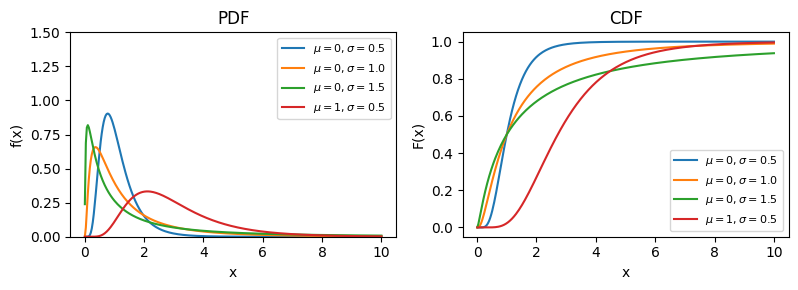

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm

fig, axes = plt.subplots(1, 2, figsize=[8, 3])

x = np.linspace(0.01, 10, 300)
params = [(0, 0.5), (0, 1.0), (0, 1.5), (1, 0.5)]
for mu, sigma in params:
    pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    axes[0].plot(x, pdf, label=fr"$\mu={mu}, \sigma={sigma}$")

    cdf = lognorm.cdf(x, s=sigma, scale=np.exp(mu))
    axes[1].plot(x, cdf, label=fr"$\mu={mu}, \sigma={sigma}$")

axes[0].set(title="PDF", xlabel="x", ylabel="f(x)", ylim=[0, 1.5])
axes[0].legend(fontsize=8)
axes[1].set(title="CDF", xlabel="x", ylabel="F(x)")
axes[1].legend(fontsize=8)
fig.tight_layout()

## 性質

- **正規分布との関係**: $X \sim \text{LogNormal}(\mu, \sigma^2)$のとき$\log X \sim N(\mu, \sigma^2)$。逆に$Y \sim N(\mu, \sigma^2)$のとき$e^Y \sim \text{LogNormal}(\mu, \sigma^2)$
- **乗法的な中心極限定理**: 多数の独立な正の確率変数の積は、対数正規分布に近似的に従う（正規分布が加法的な中心極限定理に対応するのと同様）
- **再生性はない**: 対数正規分布に従う独立な確率変数の和は対数正規分布に従わない
- 積については閉じている: $X_1 \sim \text{LogNormal}(\mu_1, \sigma_1^2), X_2 \sim \text{LogNormal}(\mu_2, \sigma_2^2)$が独立なら$X_1 X_2 \sim \text{LogNormal}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$

## 応用例

- 所得や資産の分布のモデリング
- 株価のリターン（ブラック-ショールズモデルで使用）
- 生物の体重・体長の分布
- 環境科学における汚染物質濃度の分布
- 回帰分析において対数変換を施した目的変数の元スケールでの分布